# Lab 13: Linear regression exercise 

- The hypothesis regression function: $\mathbf{ h_\theta(x_{i}) = \theta_0+\theta_1 age + \theta_2 sex + \theta_3 bmi + \theta_4 children + \theta_5 smoker + \theta_6 region }$

### Step 1: Import libraries and data
- Change the default rc (runtime configuration) settings in a python script or interactively from the python shell. All rc settings are stored in a dictionary-like variable called matplotlib.rcParams

In [15]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =10
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

C:\Users\sansa\AppData\Local\Temp\ipykernel_31656\2808491159.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [51]:
# Import data
df = pd.read_csv('insurance.csv')
print(df.shape)
print(df.head())
print(df.describe())

(1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [50]:
df.children.max()

5

### Step 2: Visualization 

C:\Users\sansa\AppData\Local\Temp\ipykernel_31656\1461544195.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

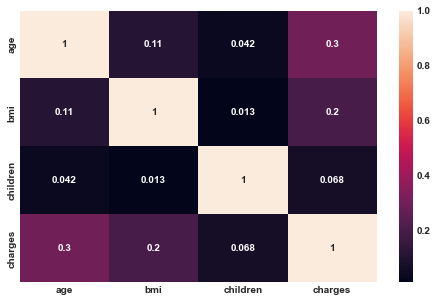

In [46]:
# Correlation plot 
corr = df.corr()
sns.heatmap(corr,annot = True)

C:\Users\sansa\AppData\Local\Temp\ipykernel_31656\1390074367.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'], bins = 50, color = 'r', ax = ax)
C:\Users\sansa\AppData\Local\Temp\ipykernel_31656\1390074367.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']

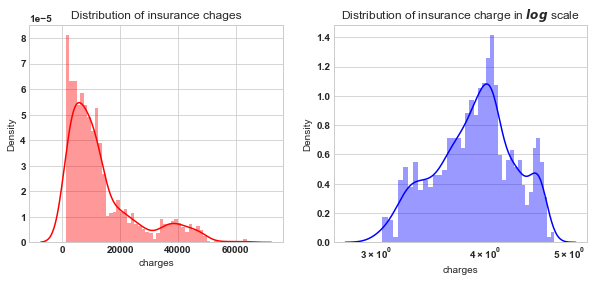

In [18]:
a = plt.figure(figsize = (10,4))
ax = a.add_subplot(121)
sns.distplot(df['charges'], bins = 50, color = 'r', ax = ax)
ax.set_title('Distribution of insurance chages')
ax = a.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax) #Return the base 10 logarithm of the input array, element-wise
ax.set_title('Distribution of insurance charge in $log$ scale')
ax.set_xscale('log')

Text(0.5, 1.0, 'Violin plot of Charges vs. Smoker')

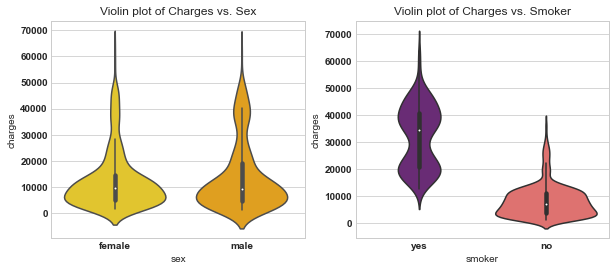

In [19]:
b = plt.figure(figsize=(10,4))
ax = b.add_subplot(121)
sns.violinplot(x='sex',y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs. Sex')

ax = b.add_subplot(122)
sns.violinplot(x='smoker',y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs. Smoker')

Text(0.5, 1.0, 'Box plot of Charges vs. Children')

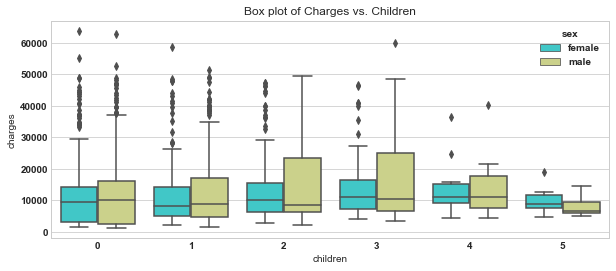

In [20]:
plt.figure(figsize=(10,4))
sns.boxplot(x='children',y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of Charges vs. Children')

In [21]:
df.groupby('children').agg(['mean','min','max'])['charges']

C:\Users\sansa\AppData\Local\Temp\ipykernel_31656\2881019953.py:1: FutureWarning: ['sex', 'smoker', 'region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('children').agg(['mean','min','max'])['charges']


,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


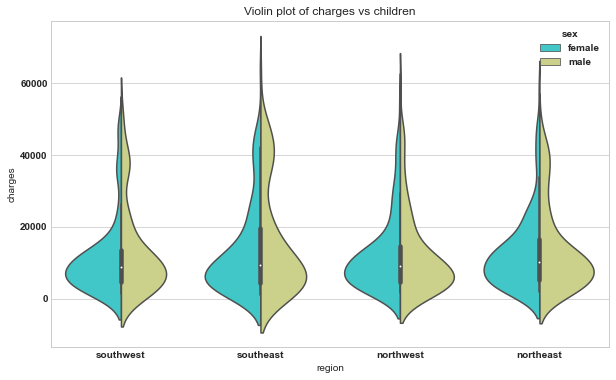

In [23]:
plt.figure(figsize=(10,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children')

Text(0.5, 1.0, 'Scatter plot of Charges vs. bmi')

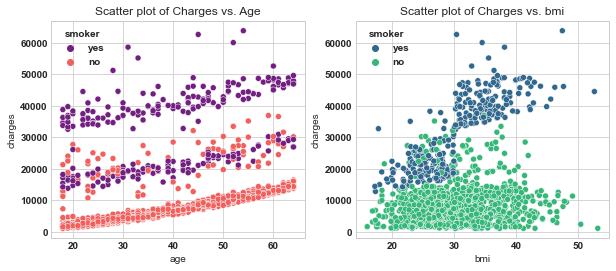

In [24]:
c = plt.figure(figsize=(10,4))
ax = c.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs. Age')

ax = c.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs. bmi')

### Step 3: Data processing 
- Encoding
  - Machine learning algorithms cannot work with categorical data directly. Categorical data must be converted to number 
- 在做分类预测的问题的时候，对特征变量的处理是很重要的一个环节。像gender=[“male”, “female”]这种特征值是有限的离散值的变量一般称为分类变量，对分类变量的处理极其重要。尽管像LightGBM、XGBoost可以自动处理分类变量。但是很多时候我们也希望自己处理。大多数时候，分类变量都是由字符串表示的特征，很多算法都无法直接使用。处理方式一般有两种：一种是用数字为每一个特征值编码，例如前面说的male/female可以使用0和1表示。另一种是利用one hot encoding（独热编码）。也就是用一个长度为特征值数量的向量表示，每一位只有0和1两种取值。
  - 使用one hot encoding可以将这个特征拆分成三个特征，分别是Red,Yellow,Green。当某个样本的Color特征是一个具体的值的时候，在新的三个特征对应的列取值1，剩下的取值为0即可。
  - 当类别变量下的不同特征值数量比较少的时候，采用one hot encoding是很有效的
![](http://www.datalearner.com/resources/blog_images/88e99acd-d2cf-4ea4-9e8f-7e022b74bf2f.png)


- 如果特征变量之间有相关性，模型将很难说出某个变量对目标的影响有多大。在这种情况下，回归模型的系数将无法传达正确的信息。但是使用上面pandas.get_dummies来处理就会引入这个问题。我们可以看到，当gender特征变成gender_male和gender_female的时候，这两个特征之间其实是冗余的。因为我们如果gender_male=1，那么gender_female=0，反过来也一样。这个问题在数学中称为多重共线性 （Multicollinearity），在pandas处理的时候有人也叫它虚拟变量陷阱（Dummy Variable Trap）。

- 这个问题的一个解决方法是加入参数drop_first=True。这也是pandas.get_dummies的一个参数，它的作用是去除第一个虚拟变量，让转换后的虚拟变量个数从原来的k个变成k-1个。例如，前面的gender变成gender_male和gender_female，如果设置drop_first=True，那么会导致结果去除了gender_male，只剩下gender_female，这样剩下的变量就没有这个问题了。
![](http://www.datalearner.com/resources/blog_images/891b6526-49e5-4df0-97dc-8424eee6abce.png)

In [26]:
# Dummy variable 
categorical_columns= ['sex','children','smoker','region']
df_encode=pd.get_dummies(data=df,prefix='OHE',prefix_sep='_',\
      columns=categorical_columns,drop_first=True,\
            dtype='int8')
df_encode

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


- Box- cox transformation 
  - A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests. All that we need to perform this transformation is to find lambda value and apply the rule shown below to your variable
  $\mathbf{ \begin {cases}\frac {y^\lambda - 1}{\lambda},& y_i\neg=0 \\
 log(y_i) & \lambda = 0 \end{cases}}$

In [28]:
from scipy.stats import boxcox 
y_bc,lam,ci=boxcox(df_encode['charges'],alpha=0.05)
ci,lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [30]:
# Log transformation 
df_encode['charges']=np.log(df_encode['charges'])

### Step 3: Regression 

In [31]:
# Train and test split 
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges', axis=1)
y = df_encode['charges']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,\
      random_state=23)

In [32]:
# Model building 
# Add X0=1 to dataset 
X_train_0=np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0=np.c_[np.ones((X_test.shape[0],1)),X_test]
# Build the model 
theta = np.matmul(np.linalg.inv(np.matmul(X_train_0.T,X_train_0)),np.matmul(X_train_0.T,y_train))

In [33]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [34]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,OHE_male,-0.067767,-0.067767
4,theta_4,OHE_1,0.149457,0.149457
5,theta_5,OHE_2,0.272919,0.272919
6,theta_6,OHE_3,0.244095,0.244095
7,theta_7,OHE_4,0.523339,0.523339
8,theta_8,OHE_5,0.466030,0.466030
9,theta_9,OHE_yes,1.550481,1.550481


### Step 4 Model evaluation 

In [36]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.18729622322981948
R square obtain for normal equation method is : 0.7795687545055312


In [37]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.18729622322981898
R square obtain for scikit learn library is : 0.7795687545055318


C:\Users\sansa\AppData\Local\Temp\ipykernel_31656\1302784434.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred_sk),ax=ax,color='b')


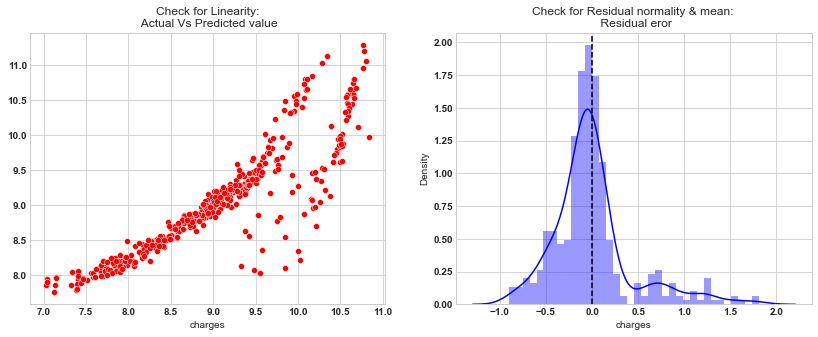

In [43]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test,y=y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

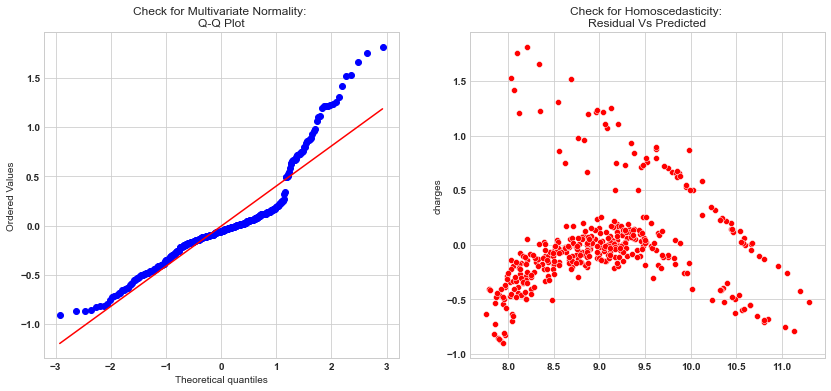

In [40]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [41]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.536561945911135